# Lab: Linear Regression

## 3.6.1 Libraries

In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

import seaborn as sns

%matplotlib inline

In [43]:
# Import data
df = pd.read_csv('./datasets/Boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Simple Linear Regression

In [44]:
# Create regression model between medv and lstat
lm = sm.OLS.from_formula('medv~lstat',data=df)
results = lm.fit()

In [45]:
# Output summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 03 Jul 2018   Prob (F-statistic):           5.08e-88
Time:                        18:43:07   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [46]:
# Access various parameters of the models
print('confidence interval:')
print(results.conf_int())
print('Intercept:')
print(results.params.Intercept)

confidence interval:
                   0          1
Intercept  33.448457  35.659225
lstat      -1.026148  -0.873951
Intercept:
34.553840879383074


In [47]:
# Make predictions with a new record
new_record = pd.DataFrame([[1,5], [1,10], [1,15]], columns=['Intercept','lstat'])
new_record

,Intercept,lstat
0,1,5
1,1,10
2,1,15


In [48]:
# Predict housing value for new record
results.predict(new_record)

0    29.803594
1    25.053347
2    20.303101
dtype: float64

In [49]:
# Make prediction but display confidence interval
def predict_with_conf(lm, record):
    '''
    Make a prediction using a linear regression model (already fit) on a new record.
    '''

    # Make prediction
    pred = pd.DataFrame(lm.predict(record),columns=['fit'])
    
    # Obtain confidence interval
    ci = lm.conf_int().rename(columns={0:'lwr',1:'upr'})
    
    # Apply confidence intervall to prediction
    ci = record.dot(ci)
    
    return pd.concat([pred,ci],axis=1)

In [50]:
predict_with_conf(results,new_record)

,fit,lwr,upr
0,29.803594,28.317716,31.289472
1,25.053347,23.186975,26.919720
2,20.303101,18.056234,22.549967


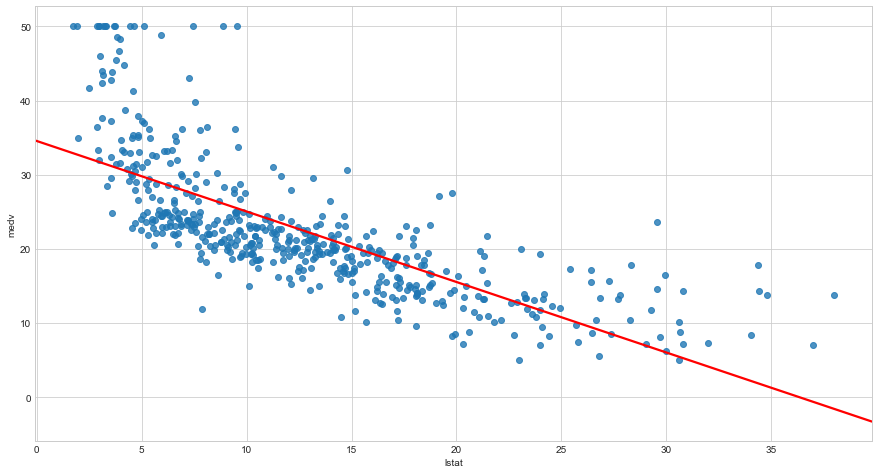

In [51]:
# Plot the regression
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
sns.regplot('lstat','medv',df,line_kws = {"color":"r"}, ci=None);

It appears that there might exist a non-linear relationship between the two features.

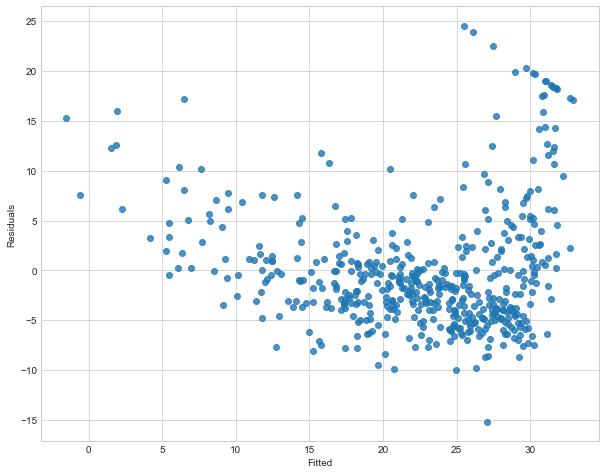

In [52]:
# Plot residual plot
fit_values = pd.Series(results.fittedvalues,name='Fitted')
residuals = pd.Series(results.resid,name='Residuals')
plt.figure(figsize=(10,8))
sns.regplot(fit_values,residuals,fit_reg=None);

From the residual plot, there is some evidence of a non-linera relationship.

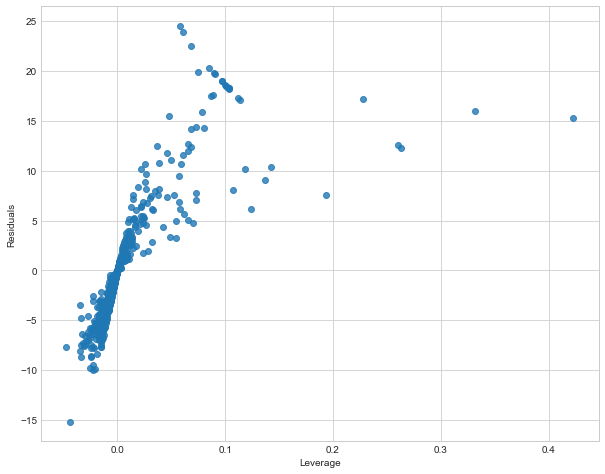

In [53]:
# Prolt the leverage statistic plot
leverage = pd.Series(OLSInfluence(results).influence, name = "Leverage")
plt.figure(figsize=(10,8))
sns.regplot(leverage,residuals,fit_reg=None);

### 3.6.3 Multiple Linear Regression

In [54]:
# Create regression model between medv, age, and lstat
lm2 = sm.OLS.from_formula('medv~lstat+age',data=df)
results2 = lm2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Tue, 03 Jul 2018   Prob (F-statistic):           2.98e-88
Time:                        18:43:08   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [55]:
# Create regression model between medv and all the others features
lm2 = sm.OLS.from_formula('medv~' + '+'.join(df.columns.difference(['medv'])),data=df)
results2 = lm2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 03 Jul 2018   Prob (F-statistic):          6.72e-135
Time:                        18:43:08   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

### 3.6.4 Interaction Terms

In [56]:
# Create regression model between medv and lstat and age with interactions
lm3 = sm.OLS.from_formula('medv~lstat*age',data=df)
results3 = lm3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Tue, 03 Jul 2018   Prob (F-statistic):           4.86e-88
Time:                        18:43:08   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

### 3.6.5 Non-Linear Transformations of the Predictors

In [57]:
lm4 = sm.OLS.from_formula('medv~lstat+np.square(lstat)',data=df)
results4 = lm4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 03 Jul 2018   Prob (F-statistic):          1.56e-112
Time:                        18:43:08   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           42.8620      0.872  

We compare the model 1 and model 4 and assess their respective performances. We perform a test hypothesis. The null hypothesis is that the two models fit the data equally.

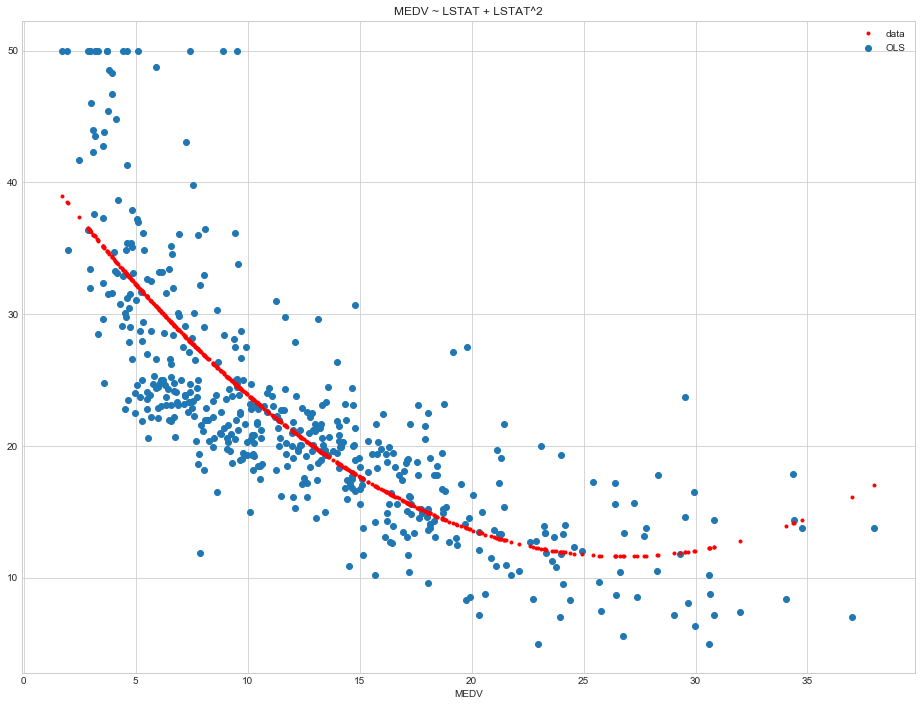

In [72]:
# Set up plot
fig, ax = plt.subplots(figsize=(16,12))

# Plot data
x_data = df.lstat.values
y_data = df.medv.values
ax.scatter(x_data,y_data)

# Plot model
ax.plot(x_data,results4.fittedvalues,marker='.',color='r',linestyle='none')
ax.set_xlabel('LSTAT')
ax.set_xlabel('MEDV')
ax.set_title('MEDV ~ LSTAT + LSTAT^2')
ax.legend(['data','OLS']);

In [73]:
sm.stats.anova_lm(results,results4)

/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


The F-statistic is 135 and the associated p-value is virtually zero. This provides very clear evidence that the model containing the predictors ${\tt lstat}$ and ${\tt lstat2}$ is far superior to the model that only contains the predictor ${\tt lstat}$. This is not surprising, since earlier we saw evidence for non-linearity in the relationship between ${\tt medv}$ and ${\tt lstat}$

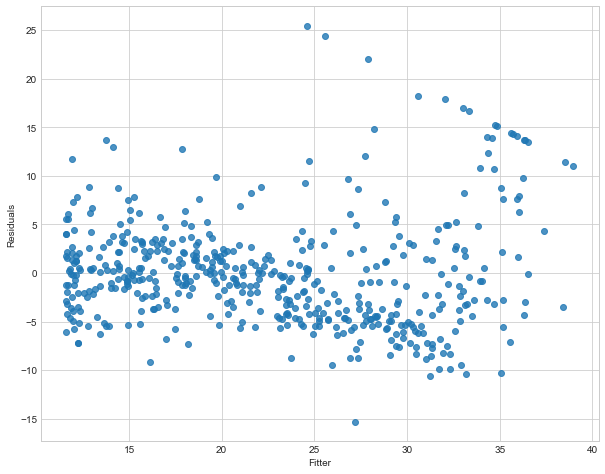

In [74]:
# Plot the residual plot for the 4th model
fit_values = pd.Series(results4.fittedvalues,name='Fitter')
residuals = pd.Series(results4.resid,name='Residuals')
plt.figure(figsize=(10,8))
sns.regplot(fit_values,residuals,fit_reg=None)

There is no clear pattern in the distribution of the residuals.

In [75]:
# We now create a higher-order polynomial model
poly_lm = sm.OLS.from_formula('medv~'+'+'.join(['np.power(lstat,'+str(pow)+')' for pow in range(6)]),data=df).fit()
print(poly_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Tue, 03 Jul 2018   Prob (F-statistic):          8.73e-122
Time:                        18:47:36   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             33.8498      1

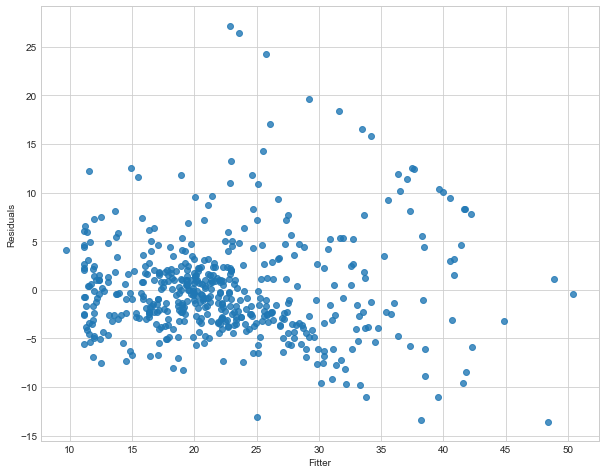

In [76]:
fit_values = pd.Series(poly_lm.fittedvalues,name='Fitter')
residuals = pd.Series(poly_lm.resid,name='Residuals')
plt.figure(figsize=(10,8))
sns.regplot(fit_values,residuals,fit_reg=None)

### Qualitative Predictors

In [77]:
# Import data
df = pd.read_csv('./datasets/Carseats.csv')
df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [78]:
df.columns

Index(['Unnamed: 0', 'Sales', 'CompPrice', 'Income', 'Advertising',
       'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [79]:
# Fit model
# Sales ~ .+Income:Advertising+Price:Age
# Meaning:
#    - Include Income and Advertising and their interaction
#    - Include Price and Age and their interaction
#    - . include all
lm = sm.OLS.from_formula('Sales ~ Income:Advertising + Price:Age+' + 
                         '+'.join(df.columns.difference(['Sales'])),data=df)
results = lm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Tue, 03 Jul 2018   Prob (F-statistic):          6.14e-166
Time:                        18:47:38   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756    